# **Q1**

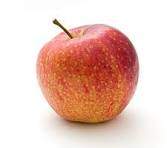

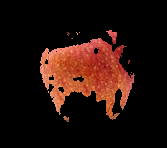

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/Q1_img.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range (example: detecting red)
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

# Create a mask
mask = cv2.inRange(hsv, lower_red, upper_red)
result = cv2.bitwise_and(image, image, mask=mask)

cv2_imshow(image)
cv2_imshow( result)
cv2.waitKey(0)
cv2.destroyAllWindows()


# **Q2: T-Pyramid Computation for Image Analysis**

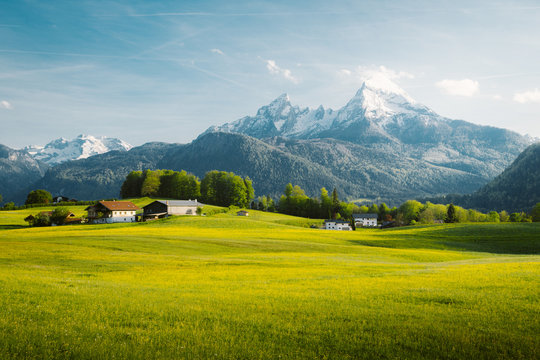

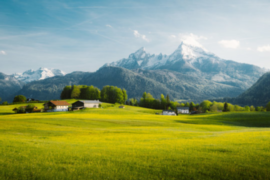

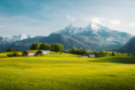

In [5]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread('/content/2.jpg')

# Create a T-pyramid (Gaussian Pyramid)
level1 = cv2.pyrDown(image)
level2 = cv2.pyrDown(level1)

# Show pyramid levels
cv2_imshow(image)
cv2_imshow(level1)
cv2_imshow(level2)
cv2.waitKey(0)
cv2.destroyAllWindows()


# **Q3: Image Smoothing Project**

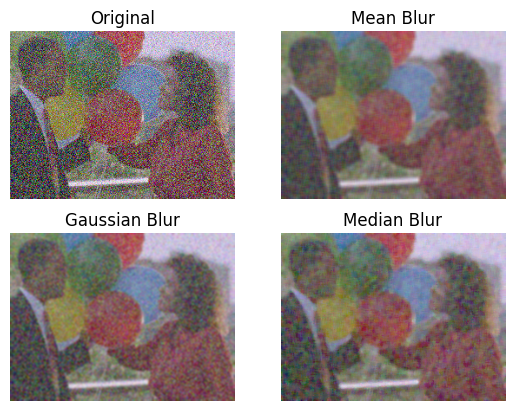

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/3.jpg')

# Apply different smoothing techniques
mean_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)

# Display the original and smoothed images
titles = ['Original', 'Mean Blur', 'Gaussian Blur', 'Median Blur']
images = [image, mean_blur, gaussian_blur, median_blur]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()


# **Q4: Edge Detection using Sobel & Canny**

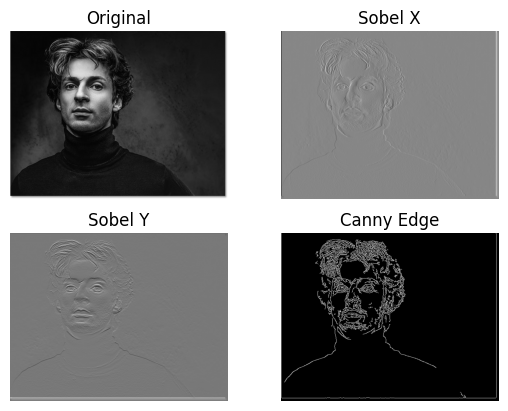

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/4.jpg', 0)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)

# Apply Canny edge detection
canny = cv2.Canny(image, 100, 200)

# Display the results
titles = ['Original', 'Sobel X', 'Sobel Y', 'Canny Edge']
images = [image, sobel_x, sobel_y, canny]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


# **Q5: Object Detection with OpenCV (Face, Eye Detection)**

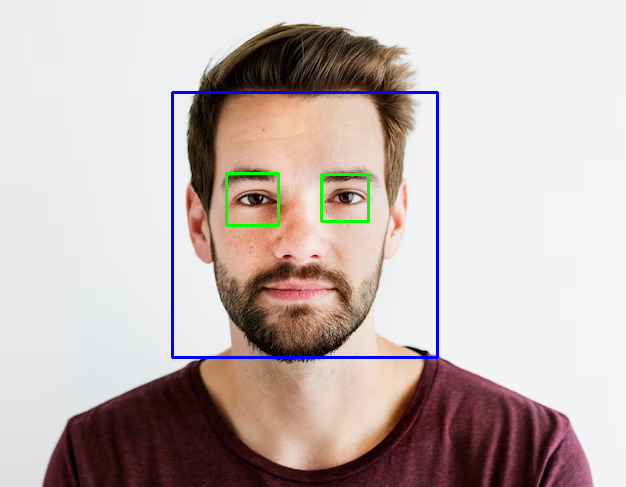

In [9]:
import cv2
from google.colab.patches import cv2_imshow
# Load Haar cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the image
image = cv2.imread('/content/5.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangles around faces and detect eyes within the face region
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    face_roi = gray[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(face_roi)

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(image, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0, 255, 0), 2)

# Display the detection result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
